In [ ]:
# SVM(サポートベクターマシン) = 「AI」に近い手法,カテゴリ-を分類するもの, PCが試行錯誤して自動で分類してくれる
# 決定木や線形回帰は統計解析でPCが試行錯誤しない

In [5]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [7]:
X = dataset.data #30次元の569のデータが説明変数
y = dataset.target #目的変数,0=乳がんではない　

# PCが試行錯誤する系はデータを学習用データとテスト用データでわける必要がある

# 分ける方法↓
# 1,Hold-out法 -> データ全体が100ある場合,6対4で分割し(割合は人間が設定する),学習用データ60個,テストデータを40個に分割する
# 6割の方を使って学習する,学習したデータをもとに4割のテストデータでテストする
# AIを作る = 未知のデータを予測させる,そのためテストデータにデータを分割する必要がある

In [12]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y) #変数を4つ指定している
# test_size -> テストデータの割合(defaultは0.25) つまり学習用データ:80%, テスト用データ:20%
# shuffle=True -> データをランダムにする, 極端に偏る可能性があるため,満遍なく分けられるようにする(defaultはTrueなので指定しなくても良い)
# stratify=y -> y(目的変数)を均等に分ける

#SVM実行

In [17]:
from sklearn.svm import SVC

svc = SVC(kernel="linear") #引数にどの線で分けるのか指定する,とりあえず最初は直線の方が良い
svc.fit(X_train, y_train) #trainの方だけ学習させる

SVC(kernel='linear')

In [19]:
# 結果の精度を見る(性能評価)
from sklearn.metrics import accuracy_score #正解率

#学習用データで何%あっているのか,テストデータで何%あっているのかを別々の見なければいけない,未知の方の正解率を見る
y_train_pred = svc.predict(X_train) # X_train予測した時に何%出るのか,正解はy_train, つまりy_trainに対してX_trainがどれくらいの精度が出ているのかを見る
accuracy_score(y_train,y_train_pred) # 正解(y_train)と　予測(y_train_pred)で比較する

# 0.9626373626373627 -> 結果約96%正解

# ↓大事なのは未知のデータに対して

0.9626373626373627

In [22]:
y_test_pred = svc.predict(X_test) 
accuracy_score(y_test,y_test_pred)

# 0.9736842105263158 -> 結果約96%正解,高い精度

0.9736842105263158

#図を作る

In [27]:
pip install umap-learn

     |████████████████████████████████| 86 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 22.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=32f4095e50be7e785edf576f43f84e41bda6b1749f595eddd1a52696532d58ac
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=066313fe4966a73584a7156c796bb3bb0ba86891294b28fd87b63d2b24b90c5e
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


findfont: Font family ['Hiragino Maru Gothic Pro'] not found. Falling back to DejaVu Sans.


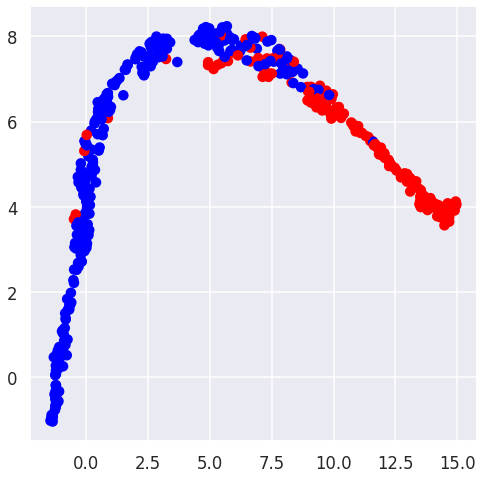

In [28]:
# 次元削減して図にする

#UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from scipy.sparse.csgraph import connected_components

model_umap = umap.UMAP(n_components=2,n_neighbors=100)
vecs_list = model_umap.fit_transform(X_train)

X = vecs_list[:,0]
Y = vecs_list[:,1]

sns.set(font="Hiragino Maru Gothic Pro",context="talk")
plt.figure(figsize=(8, 8))

color_codes = {0:"red",1:"blue",2:"green",3:"yellow"}
colors = [color_codes[x] for x in y_train]
plt.scatter(X,Y,color=colors)

# 何となく分かれている部分と混ざっている部分がある,ごちゃごちゃだと分類できていないためSVMでは適していないと判断できる,今回はまずまず良い